In [13]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt 

In [2]:
cnx = sqlite3.connect('../soccer/database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
data.shape

(183978, 42)

In [5]:
data = data.dropna()
data.shape

(180354, 42)

In [7]:
features = list(data.columns[~(data.columns.str.contains('id'))])
features
features.remove('date')
features.remove('overall_rating')
features
data[features].head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,positioning,vision,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,66.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0


In [8]:
remove = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for i in remove:
    features.remove(i)
features

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [17]:
for feature in features:
    co = data['overall_rating'].corr(data[feature])
    dict[feature] = co
dict

TypeError: 'type' object does not support item assignment

In [19]:
x_values = []
y_values = []
for value in dict:
    x_values.append(value)
    y_values.append(dict[value])

# Plotting the values using matplotlib.pyplot
plt.xlabel('Features in the data')
plt.ylabel('Correlation Coefficient with Overall Rating')
plt.title('Correlation of Overall Rating with different features')
plt.yticks([0, 1])

figure(num = None, figsize = (30, 6), dpi=80, facecolor='w', edgecolor='k')


TypeError: 'type' object is not iterable

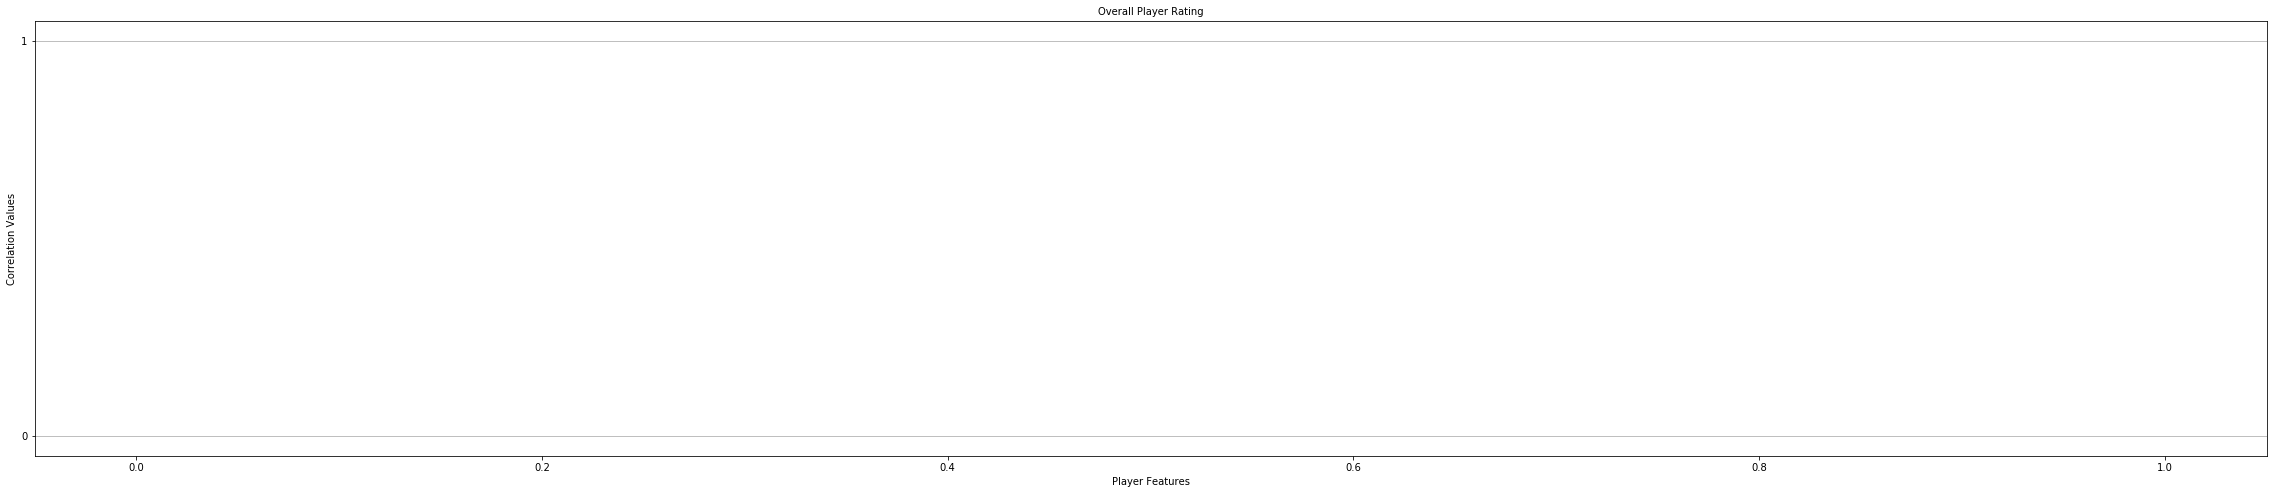

In [20]:
#Plotting a subplot
fig, axis = plt.subplots(figsize = (40, 8))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Overall Player Rating',fontsize=10)
axis.set_xlabel('Player Features',fontsize=10)   
axis.set_ylabel('Correlation Values',fontsize=10)
axis.set_yticks([0,1])
axis.set_yticklabels(['0', '1'])

# # We can also use this to set figure size 
# f.set_figheight(15)
# f.set_figwidth(15)

axis.plot(x_values, y_values)
plt.show()